<span style="font-size: 30px;"><b>Understanding the Intentions of Online Shoppers: Exploring Purchasing Behavior</b></span>

Author: Sukanya Lahkar  
Date: 15-05-2024

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<b> INTRODUCTION </b>

In today's digital age, businesses are constantly seeking innovative methods to enhance customer experiences. One prominent method is the expansion of online shopping platforms, where organizations compete for substantial revenue. To maintain a competitive edge in this landscape, companies must excel in various business initiatives. Among these endeavors, leveraging machine learning models to interpret customers' past purchase intentions stands out as a pivotal strategy.  

The objective of this project is to leverage insights gained from analyzing customers' purchasing behavior to make data-driven decisions aimed at improving the online shopping experience, increasing customer satisfaction, and ultimately driving higher sales conversions. As part of the analysis, supervised machine learning algorithms will be utilized to predict online shopper's behavior based on historical data - whether a customer is likely to make a purchase or abandon the site. Unsupervised machine learning algorithms will also be employed to group visitors based on their browsing patterns or session duration. Further, a comparative study will be conducted to evaluate the performance of the different supervised algorithms based on their predictive accuracy and other relevant metrics.

This project serves as a valuable opportunity to delve into the complex world of machine learning and data analysis techniques while addressing a tangible real-world challenge. By gaining insights into customer purchase intentions, one can aim to not only help elevate customer satisfaction but also catalyze revenue growth for businesses. This hands-on experience will not only deepen one's understanding of machine learning but also equip them with practical skills that can be applied across various industries.  

The online shoppers' intention dataset from the UCI (University of California, Irvine) data repository has been used for this undertaking.  

© Citation: Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

<b> INFORMATION ABOUT THE DATASET </b>  

The dataset used in this project, from the observational study conducted by Sakar <i>et al. (2019),</i> was collected from an online retailer's website over a period of one year. To ensure the dataset's reliability and to avoid biases, several measures were taken during the data collection process:  
1. The dataset was structured to include sessions from a diverse range of users.
2. The data collection spanned a 1-year period to capture seasonal variations, trends, and any potential changes in user behavior over time.
3. Special care was taken to ensure that the dataset remained neutral with respect to any specific marketing campaigns or promotions run by the retailer. 
4. To protect user privacy and comply with data protection regulations, personal identifying information was anonymized or removed from the dataset. 
5. The data collection process likely involved continuous monitoring of user interactions on the website to capture real-time behavioral data.
6. Metrics such as bounce rate, exit rate, and page value were likely collected using analytics tools like Google Analytics. These tools provide detailed insights into user behavior, engagement, and conversion metrics, which were incorporated into the dataset to enrich the analysis.  
  
The cases, or units of observation, in the dataset are individual sessions conducted by visitors on the online retailer's website. Each session represents a discrete instance of interaction between a user and the website within a specific time frame. These sessions serve as the fundamental units for analyzing online shopper behavior and predicting their purchasing intentions and likelihood of site abandonment. These 12,330 individual sessions are labeled as either positive class samples (ending with a shopping transaction) or negative class samples (not resulting in shopping) - 84.5% (10,422) are negative class samples, and the rest (1908) are positive class samples. Each session is characterized by a combination of numerical(10) and categorical(8) features, as shown in the table below. 

In [2]:
from tabulate import tabulate
#Create a DataFrame with two columns and 19 rows
data = {
    'FEATURE NAME': ['Administrative', 'Administrative duration', 'Informational', 'Informational duration', 'Product related', 'Product related duration', 'Bounce rate', 'Exit rate', 'Page value', 'Special Day', 'Operating Systems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'Revenue'], 
    'FEATURE DESCRIPTION': ['Number of pages visited by the visitor about account management', 'Total amount of time(in seconds) spent by the visitor on account management related pages', 'Number of pages visited by the visitor about Website, communication and address information', 'Total amount of time(in seconds) spent by the visitors on informational pages', 'Number of pages visited by the visitor about product related pages', 'Total amount of time(in seconds) spent by the visitor on product related pages', 'Average bounce rate value of the pages visited by the visitor', 'Average exit rate value of the pages visited by the visitor', 'Average page value of the pages visited by the visitor', 'Closeness of the site visiting time to a special day', 'Operating system of the visitor', 'Browser of the visitor', 'Geographic region from which the session has been started by the visitor', 'Traffic source by which the visitor has arrived at the Website(eg., banner, SMS, direct)', 'Visitor type as "NewVisitor","ReturningVisitor", and "Other"', 'Boolean value indicating whether the date of the visit is weekend', 'Month value of the visit date', 'Class label indicating whether the visit has been finalized with a transaction']
}
 
#Display the DataFrame
print(tabulate(data, headers='keys', tablefmt ='fancy_grid'))

╒══════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════╕
│ FEATURE NAME             │ FEATURE DESCRIPTION                                                                         │
╞══════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════╡
│ Administrative           │ Number of pages visited by the visitor about account management                             │
├──────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│ Administrative duration  │ Total amount of time(in seconds) spent by the visitor on account management related pages   │
├──────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│ Informational            │ Number of pages visited by the visitor about Website, communication and address information │
├───────────────

<b> DATA QUALITY </b>  

Below, the dataset is loaded and assessed for its quality through checks conducted for missing values. Data summarization is also carried out. There are no null values; however, there are duplicates in the dataset. Data cleaning steps are then performed by removing the duplicates.  

In [3]:
#Load data
import pandas as pd
df = pd.read_csv(r"C:\Users\asus\Documents\ISE 233 - Op Data Analysis\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
#Data cleaning
print("Data Quality Assessment:")
print(df.shape)
print(df.isnull().sum())  #Check for missing values
print(df.duplicated().sum())  #Check for duplicates
print(df.describe())  #Summary statistics 

Data Quality Assessment:
(12330, 18)
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
125
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000             

In [5]:
df_original = df.copy()
df = df.drop_duplicates()  #Remove duplicates
print(df.duplicated().sum())  #Confirm if duplicates are removed
df_usp = df.copy() #this data will be used later for unsupervised learning

0


In [6]:
df.dtypes.value_counts()

int64      7
float64    7
object     2
bool       2
Name: count, dtype: int64

<b> EXPLORING VARIABLES AND THEIR INFLUENCE ON TARGET VARIABLE "REVENUE"</b>    

Exploratory data analysis is performed on some key variables to understand their patterns, that can help in identifying potential correlations with the 'Revenue' target variable. The first subplot displays the distribution of the 'Browser' feature, that shows the frequency of each browser used by visitors to the website. The second subplot visualizes the distribution of 'OperatingSystems', indicating the frequency of different operating systems used by visitors. The third subplot presents the distribution of visitors across different regions, while the fourth subplot illustrates the distribution of visitor types (like returning visitors, new visitors, etc.). From the plots, it can be inferred that the website predominantly attracts visitors who use browser number 2, with a noteworthy number also using browser 1. These visitors primarily utilize operating systems 2, 3, and 4, with the highest proportion favoring operating system 2. Conversely, there's minimal traffic from users with operating systems numbered 5, 6, 7, and 8. A significant portion of the website's visitors are returning users, while the count of new visitors remains relatively modest. The site draws visitors from various regions, with regions 1, 3, 4, and 2 standing out as notable targets for marketing efforts.

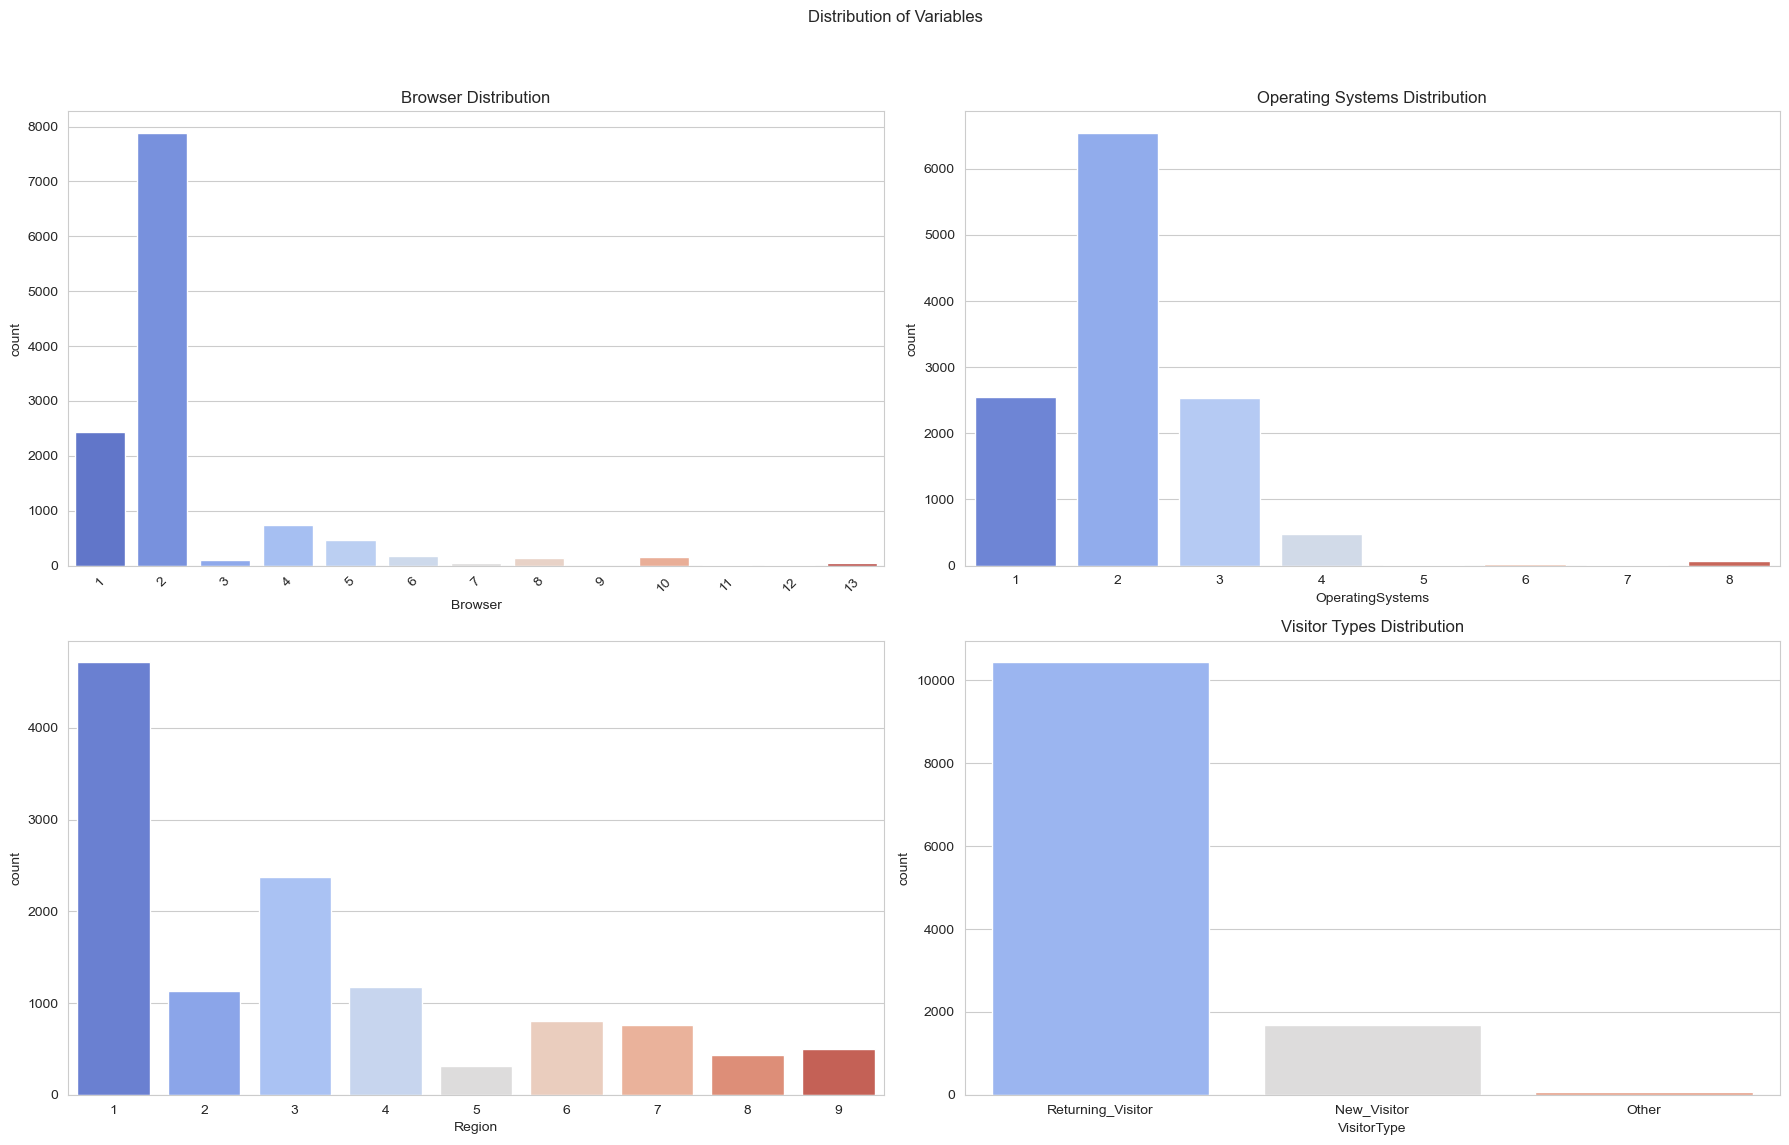

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# creating subplots for the distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Variables')

# Browser distribution
sns.countplot(ax=axes[0, 0], x='Browser', data=df, palette='coolwarm')
axes[0, 0].set_title('Browser Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Operating Systems distribution
sns.countplot(ax=axes[0, 1], x='OperatingSystems', data=df, palette='coolwarm')
axes[0, 1].set_title('Operating Systems Distribution')

#Region distribution
sns.countplot(ax=axes[1, 0], x='Region', data=df, palette='coolwarm')
axes[1, 1].set_title('Region Distribution')

#Visitor Types distribution
sns.countplot(ax=axes[1, 1], x='VisitorType', data=df, palette='coolwarm')
axes[1, 1].set_title('Visitor Types Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

It is to be noted that different machine learning algorithms and libraries may have specific requirements regarding the format of input data. Proper formatting ensures that the data is compatible with the chosen algorithms and tools. As such, in the below code, the "object" data type variables as well as the "binary" data type variables are converted and assigned categorical codes respectively. This kind of data formatting will ensure uniformity and consistency in the structure and representation of data, making it easier to work with and analyze further.

In [8]:
#Data formatting
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
objcol = df.select_dtypes(include=['object']).columns
df[objcol] = df[objcol].astype('category')
categorical_columns = df.select_dtypes(include='category').columns
#Convert all categorical columns to category codes
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.codes)
df.shape
df.head(`)

(12205, 18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


After cleaning the data, the number of sessions in the dataset has reduced to 12205. On checking if the class samples are balanced for these number of sessions, it is found that 84.36% are negative class samples and 15.63% are positive samples. Thus, while proceeding to perform analysis further using supervised learning algorithms, necessary steps may have to be taken for these unbalanced class samples, so that the models perform well.

In [9]:
#Check if dataset is balanced for both positive and negative class samples
#Count the number of samples for each class
count_negative = df[df['Revenue'] == 0].shape[0]
count_positive = df[df['Revenue'] == 1].shape[0]

#Calculate the percentage of each class
total_samples = len(df)
percentage_negative = (count_negative / total_samples) * 100
percentage_positive = (count_positive / total_samples) * 100

print("Percentage of negative class samples:", percentage_negative)
print("Percentage of positive class samples:", percentage_positive)

Percentage of negative class samples: 84.36706267922982
Percentage of positive class samples: 15.632937320770177


<b>HANDLING CLASS IMBALANCE</b>   

Following our previous data quality assessment, it was determined that the dataset exhibits class imbalance, with significant differences in the number of observations across classes. Therefore, the next step involves addressing this issue by balancing the classes. The code below effectively balances the classes by oversampling the minority class (Revenue = 1) using the resample function from the sklearn.utils module. The oversampled minority class is combined with the original majority class (Revenue = 0) to create a balanced dataset. The output demonstrates that both classes now have an equal number of observations, with 10,297 instances each. This balanced dataset can now be used for further analysis or modeling, mitigating the issues associated with class imbalance.

In [10]:
from sklearn.utils import resample

#separate majority and minority classes
majority = df[df.Revenue == 0]
minority = df[df.Revenue == 1]

#oversample minority class
minority_oversampled = resample(minority, replace = True, n_samples=len(majority), random_state=42)

#combine majority class with oversampled minority class
balanced_data = pd.concat([majority, minority_oversampled])

#checking distribution of undersampled and oversampled datasets
oversampled_distribution = balanced_data['Revenue'].value_counts()
oversampled_distribution

Revenue
0    10297
1    10297
Name: count, dtype: int64

Now, let’s compare the distributions of key numerical variables between the original dataset and the balanced dataset. The visualization below shows that the oversampled data does look like the original data, which suggests that the process of oversampling has effectively preserved the distribution of the original dataset while balancing the classes. So now, the balanced dataset can be used for further analysis or modeling with confidence that it accurately represents the original dataset.

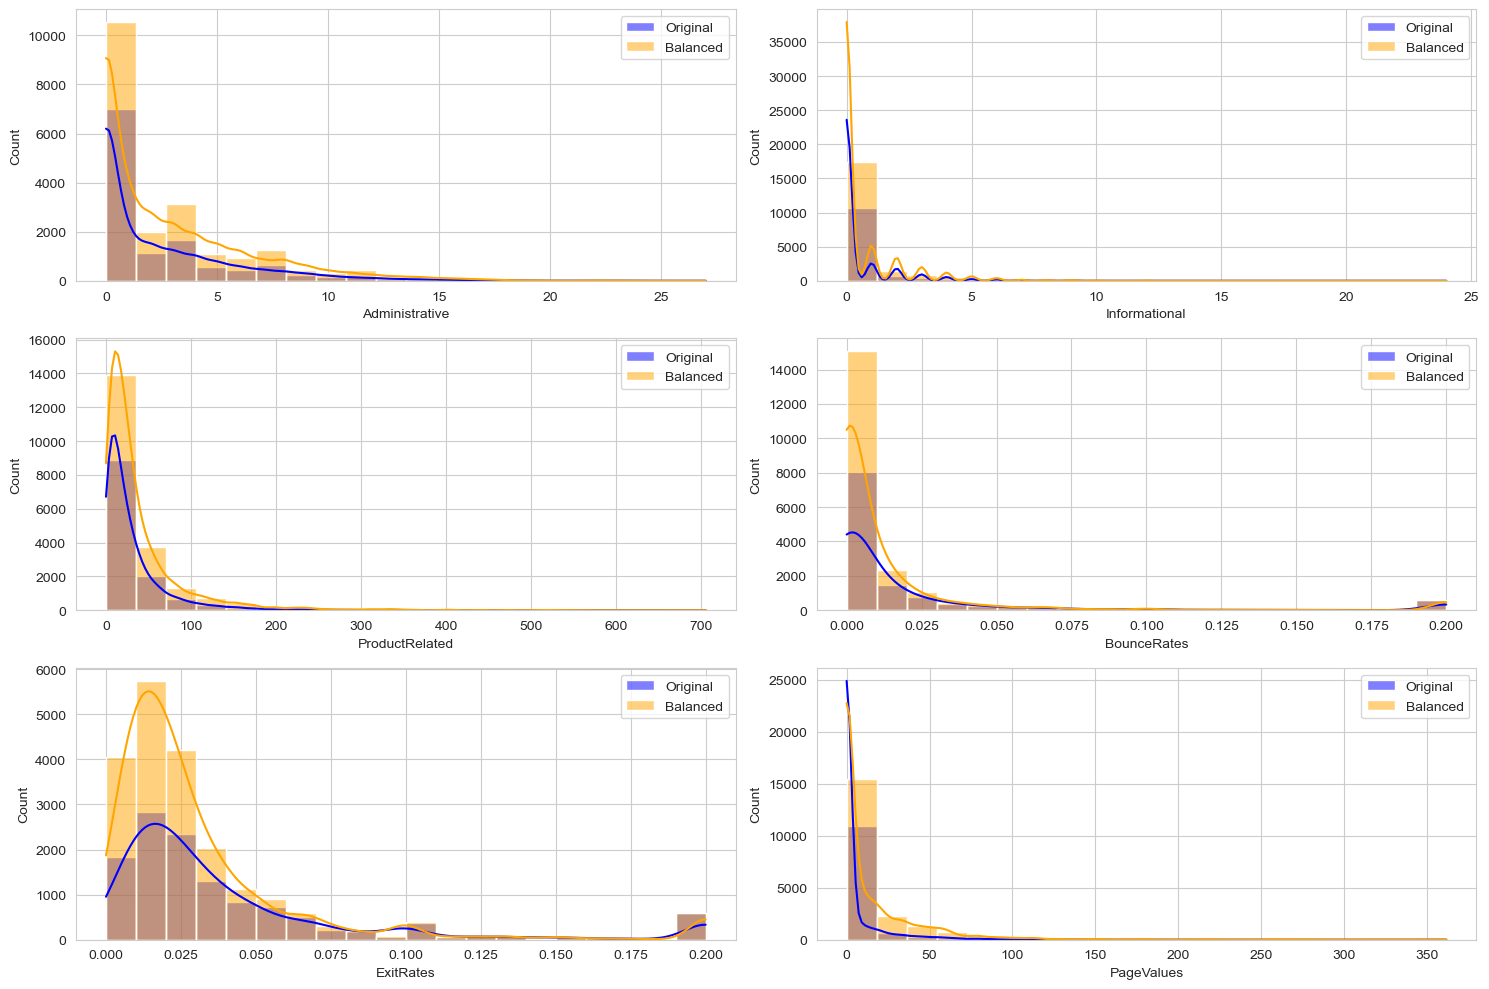

In [11]:
# Compare distribution of key numerical variables
key_numerical_vars = ['Administrative', 'Informational', 'ProductRelated',
                      'BounceRates', 'ExitRates', 'PageValues']

plt.figure(figsize=(15, 10))
for i, var in enumerate(key_numerical_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[var], bins=20, kde=True, color='blue', label='Original', alpha=0.5)
    sns.histplot(balanced_data[var], bins=20, kde=True, color='orange', label='Balanced', alpha=0.5)
    plt.xlabel(var)
    plt.legend()
    
plt.tight_layout()
plt.show();

<b> MODEL FITTING, TRAINING AND PREDICTION, USING SUPERVISED LEARNING ON BALANCED DATASET (FOR ALL FEATURES)</b>  

While it is important to make sure that models are fitted and trained using the most relevant features of the dataset, let us first check how the models perform if all the features are considered. K-fold cross-validation scores are also checked for model overfitting.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# prepare the data
X_bd = balanced_data.drop('Revenue', axis=1)
y_bd = balanced_data['Revenue']

# split the data into training and testing sets
X_trainbd, X_testbd, y_trainbd, y_testbd = train_test_split(X_bd, y_bd, test_size=0.2, random_state=42)

# scale the features
sc = StandardScaler()
X_trainbd_scaled = sc.fit_transform(X_trainbd)
X_testbd_scaled = sc.transform(X_testbd)

The next lines of code, below, is a function that trains different classifiers (Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine) on the scaled training data and evaluates their performance on the scaled testing data. The code iterates through each classifier, fits it to the training data, predicts on the testing data, and calculates various evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. To store these evaluation metrics for each model and instances of the different classifiers used, two dictionaries 'metrics' and 'models' are initialized. The metrics dictionary is converted into a pandas DataFrame, which provides a comprehensive overview of the performance of each model in the output. These metrics offer insights into how well each classifier is performing in terms of correctly classifying instances of the target variable (in this case, 'Revenue').

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_models(X_train, X_test, y_train, y_test):
    # Dictionary to store evaluation metrics for each model
    metrics = {
        "Model": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1-score": [],
        "AUC-ROC": []
    }

    # initialize the models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Support Vector Machine": SVC(random_state=42)
    }

    # Iterate through each classifier
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics["Model"].append(name)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["Precision"].append(precision_score(y_test, y_pred))
        metrics["Recall"].append(recall_score(y_test, y_pred))
        metrics["F1-score"].append(f1_score(y_test, y_pred))
        metrics["AUC-ROC"].append(roc_auc_score(y_test, y_pred))

        # Check for model overfitting
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print("Model: {}, Cross-Validation Mean Score: {:.4f}, Cross-Validation Std Deviation: {:.4f}".format(name, np.mean(scores), np.std(scores)))

    return pd.DataFrame(metrics)

We call the above function now by giving the necessary parameters.

In [14]:
# Call the function to evaluate models trained and tested on the balanced dataset containing all features
metrics_balanced_allf = evaluate_models(X_trainbd_scaled, X_testbd_scaled, y_trainbd, y_testbd)
metrics_balanced_allf

Model: Logistic Regression, Cross-Validation Mean Score: 0.8212, Cross-Validation Std Deviation: 0.0066
Model: Decision Tree, Cross-Validation Mean Score: 0.9414, Cross-Validation Std Deviation: 0.0027
Model: Random Forest, Cross-Validation Mean Score: 0.9566, Cross-Validation Std Deviation: 0.0018
Model: Support Vector Machine, Cross-Validation Mean Score: 0.8466, Cross-Validation Std Deviation: 0.0077


,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,0.824472,0.876889,0.757005,0.812549,0.824818
1,Decision Tree,0.949745,0.912351,0.995652,0.952183,0.949510
2,Random Forest,0.965040,0.938525,0.995652,0.966245,0.964883
3,Support Vector Machine,0.853605,0.881039,0.819324,0.849061,0.853781


Based on the above output, it can be observed that when trained on all features, Decision Tree and Random Forest have high accuracy, precision, recall, and F1-score, indicating strong overall performance. Random Forest has the highest F1-score, indicating it balances precision and recall the best among the models. Support Vector Machine has the lowest F1-score, indicating comparatively weaker performance in balancing precision and recall. Overall, in general, the models are all performing well. Also, based on the cross-validation results obtained, for Logistic Regression, there's a moderate level of performance, suggesting that the model is not overfitting but could potentially benefit from further feature engineering. For the Decision Tree, there's a slight possibility of overfitting due to the high accuracy, but the small standard deviation indicates stable performance. As for the Random Forest, the score is very high and consistent across folds, indicating excellent generalization performance and minimal risk of overfitting due to the high accuracy and low standard deviation. For SVM, while the performance is moderate, there's a possibility of overfitting due to the relatively high standard deviation.   
  
Let us now select important features from the dataset and check how different the models perform in comparison.

<b>FEATURE SELECTION ON BALANCED DATASET</b>   

First, we fit a RandomForestClassifier model to the dataset and extract feature importance scores. These importance scores provide insights into which features are most influential in predicting the target variable - Revenue, and help to focus on these relevant features for model development further. The interpretation of the output suggests that 'PageValues' is the most important feature, followed by 'ProductRelated_Duration', 'ExitRates', 'ProductRelated', and so on.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# separate features and target variable
X_rf = df.drop('Revenue', axis=1)
y_rf = df['Revenue']

# create a random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_rf, y_rf)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X_rf.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

RandomForestClassifier(random_state=42)

                    Feature  Importance
8                PageValues    0.384021
5   ProductRelated_Duration    0.091678
7                 ExitRates    0.086698
4            ProductRelated    0.073025
1   Administrative_Duration    0.057650
6               BounceRates    0.056459
10                    Month    0.042989
0            Administrative    0.041498
14              TrafficType    0.030913
13                   Region    0.029900


<b><b>MODEL FITTING, TRAINING AND PREDICTION, USING SUPERVISED LEARNING ON BALANCED DATASET (ONLY IMPORTANT FEATURES)</b>    
</b>   

We now use the important features obtained earlier, and separate these features from the target variable "Revenue" from our balanced dataset. The data is also split into training and testing sets, with the testing dataset set to 20% of the total data, and a random state of 42 is used for reproducibility. The features are also scaled to ensure they are on the same level.

In [16]:
# Selecting only the important features from the balanced dataset for model fitting
important_features = ['PageValues', 'ProductRelated_Duration', 'ExitRates', 'ProductRelated', 
                      'Administrative_Duration', 'BounceRates', 'Month', 'Administrative', 
                      'TrafficType', 'Region', 'Revenue']

balanced_selected = balanced_data[important_features]


# prepare the oversampled data
X_balanced = balanced_selected.drop('Revenue', axis=1)
y_balanced = balanced_selected['Revenue']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# scale the features
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled.shape

(16475, 10)

In [17]:
X_test_scaled.shape

(4119, 10)

We call the function again for model fitting, training and prediction on the balanced dataset that now has only the relevant features. K-cross validation scoring is also checked for model overfitting.

In [18]:
# Call the function to evaluate models trained and tested on the balanced dataset containing important features
metrics_balanced = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)
metrics_balanced

Model: Logistic Regression, Cross-Validation Mean Score: 0.8204, Cross-Validation Std Deviation: 0.0072
Model: Decision Tree, Cross-Validation Mean Score: 0.9415, Cross-Validation Std Deviation: 0.0027
Model: Random Forest, Cross-Validation Mean Score: 0.9550, Cross-Validation Std Deviation: 0.0025
Model: Support Vector Machine, Cross-Validation Mean Score: 0.8348, Cross-Validation Std Deviation: 0.0085


,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,0.823744,0.880090,0.751691,0.810839,0.824113
1,Decision Tree,0.950473,0.915405,0.993237,0.952734,0.950254
2,Random Forest,0.964555,0.936876,0.996618,0.965824,0.964390
3,Support Vector Machine,0.842923,0.878659,0.797585,0.836161,0.843155


Based on the above metrics, we have the following summary:  
1. <i>Logistic Regression</i> : The logistic regression model achieves a moderate level of accuracy, correctly classifying about 82.37% of instances. It has a high precision score, indicating that when it predicts a positive outcome (revenue), it is correct about 88.01% of the time. The recall score suggests that the model captures about 75.17% of all actual positive instances. The F1-score, which balances precision and recall, is around 81.08%. he AUC-ROC score indicates that the model performs reasonably well in distinguishing between the classes, with an area under the ROC curve of 82.41%. The cross-validation score is relatively stable across folds, indicating consistent performance and suggesting that the model is not overfitting.
2. <i>Decision Tree</i> : The decision tree classifier achieves a high accuracy score, correctly classifying about 95.05% of instances. It exhibits high precision, implying that it maintains a low false positive rate (about 8.46%). The recall score is exceptionally high, indicating that the model captures the vast majority of actual positive instances (about 99.32%). The F1-score is also high at around 95.27%. The AUC-ROC score suggests excellent performance in distinguishing between the classes, with an area under the ROC curve of 95.03%. There's a slight possibility of overfitting due to the high accuracy, but the small standard deviation indicates stable performance. 
3. <i>Random Forest</i> : The random forest classifier achieves the highest accuracy score among all models, correctly classifying about 96.46% of instances. It maintains a high precision score, indicating a low false positive rate (about 6.31%). The recall score is exceptionally high, capturing almost all actual positive instances (about 99.66%). The F1-score  is also very high at around 96.58%. The AUC-ROC score indicates outstanding performance in distinguishing between the classes, with an area under the ROC curve of 96.44%. Also, based on the K-fold cross-validation score, there's minimal risk of overfitting given the high accuracy and low standard deviation.
4. <i>Support Vector Machine(SVM)</i> : The SVM classifier achieves a moderate level of accuracy, correctly classifying about 84.29% of instances. It maintains a high precision score, indicating a low false positive rate (about 12.13%). The recall score suggests that the model captures about 79.76% of all actual positive instances. The F1-score is around 83.62%. The AUC-ROC score suggests good performance in distinguishing between the classes, with an area under the ROC curve of 84.32%. However, the performance is moderate, and there's a slightly higher risk of overfitting compared to the other models.   
  
Overall, the observations remain largely similar to the previous analysis of using all features for the models. The Decision Tree and Random Forest models continue to exhibit high and stable cross-validation scores, indicating good generalization performance. The Logistic Regression model shows moderate performance, while the Support Vector Machine model performs slightly lower with a higher risk of overfitting. As our analysis in both the scenarios do not show a significant difference, we can either choose to have only the important features or all the features in our model.  

Since the Random Forest classifier performs the best across all metrics, exhibiting high accuracy, precision, recall, F1-score, and AUC-ROC, we will use this classifier further now.

<b>EVALUATE PERFORMANCE OF THE BEST MODEL(RANDOM FOREST) ON ORIGINAL IMBALANCED DATASET</b>  

We now employ the random forest classifier model trained on the balanced dataset to make predictions on our imbalanced dataset. Scaling is typically unnecessary for random forest classification. Additionally, given the dataset's imbalance, we refrain from applying scaling to avoid potentially compromising our model's performance further.

In [19]:
df_selected = df[important_features]

# prepare the imbalanced dataset
X_df = df_selected.drop('Revenue', axis=1)
y_df = df_selected['Revenue']

# split the data into training and testing sets
X_traindf, X_testdf, y_traindf, y_testdf = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [20]:
from sklearn.metrics import classification_report

r_model = RandomForestClassifier(random_state=42)
r_model.fit(X_train, y_train) #trained on the unscaled balanced dataset

predicted_labels = r_model.predict(X_testdf) #predict on the imbalanced dataset
print("Classification Report:")
print(classification_report(y_testdf, predicted_labels))

# Create a DataFrame to compare actual vs predicted labels
comparison_df = pd.DataFrame({'Actual': y_testdf, 'Predicted': predicted_labels})

# Display the DataFrame
print("Comparison between Actual and Predicted Labels:")
print(comparison_df)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2079
           1       0.93      1.00      0.96       362

    accuracy                           0.99      2441
   macro avg       0.96      0.99      0.98      2441
weighted avg       0.99      0.99      0.99      2441

Comparison between Actual and Predicted Labels:
       Actual  Predicted
6045        0          0
7750        1          1
203         0          0
10452       0          0
1177        0          0
...       ...        ...
8420        0          0
2679        0          0
11378       0          0
7733        0          0
8431        0          0

[2441 rows x 2 columns]


Based on the classification report generated, below is the summary:
1. <i>Precision</i>: For class 0 (negative class), the precision is 1.00, indicating that all instances predicted as class 0 are indeed class 0. For class 1 (positive class), the precision is 0.93, suggesting that 93% of instances predicted as class 1 are actually class 1. 
2. <i>Recall</i>: For class 0, the recall is 0.99, indicating that 99% of actual class 0 instances are correctly classified as class 0. For class 1, the recall is 1.00, meaning that all actual class 1 instances are correctly classified as class 1.
3. <i>F1-score</i>: For class 0, the F1-score is 0.99, and for class 1, it is 0.96.  
  
There are 2079 instances of class 0 and 362 instances of class 1 in the testing dataset.The overall accuracy of the model is 0.99, indicating that 99% of instances are correctly classified. Overall, it can be concluded that the model is effective in classifying instances from the imbalanced dataset.

<b>VISUALIZING THE PERCENTAGE OF CORRECTLY CLASSIFIED AND MISCLASSIFIED SAMPLES</b>  
Below a pie-chart is generated to visualize the classification accuracy of the model. Correctly-classified calculates the number of instances that were correctly classified by comparing the 'Actual' labels with the 'Predicted' labels. Misclassified calculates the number of instances that were incorrectly classified by comparing the 'Actual' labels with the 'Predicted' labels. As can be observed from the visualization, our model accurately classifies the instances 98.8% of the times.

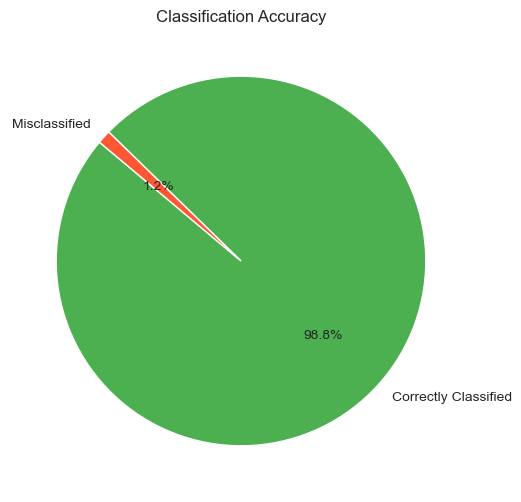

In [21]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show();

<b>DIVING TOWARDS UNSUPERVISED LEARNING</b>   

Given our model's impressive 98% prediction accuracy, we'll now turn our attention to understanding the underlying groups in our data. Since we lack predefined group labels, we'll employ unsupervised learning technique. Our aim is to uncover the number of groups present and delineate how these groups differ. To achieve this, exploratory data analysis has been conducted below on selected features.  

<Figure size 1000x600 with 0 Axes>

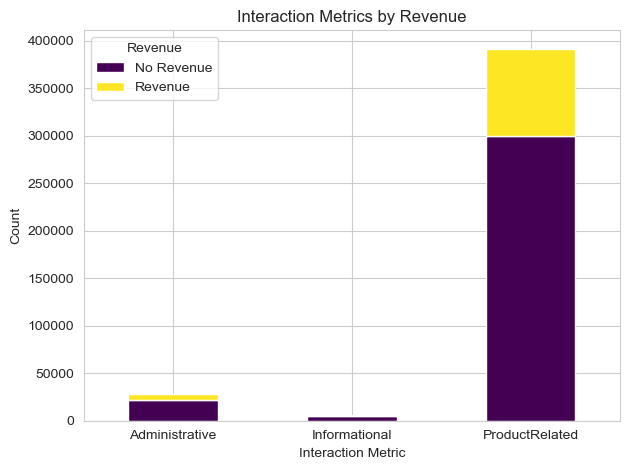

In [22]:
import warnings
df_usp['Revenue'] = df_usp['Revenue'].astype(int)

# Interaction metrics
interaction_metrics = ['Administrative', 'Informational', 'ProductRelated']
interaction_duration_metrics = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
engagement_metrics = ['BounceRates', 'ExitRates', 'PageValues']

# Create a DataFrame to store the counts of each interaction metric by revenue status
interaction_revenue_counts = df_usp.groupby('Revenue')[interaction_metrics].sum().transpose()

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
interaction_revenue_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Interaction Metrics by Revenue')
plt.xlabel('Interaction Metric')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Revenue', labels=['No Revenue', 'Revenue'])
plt.tight_layout()
plt.show();

  From the output of the stacked bar plot above, it is evident that informational interactions may play a less significant role in revenue generation compared to the other metrics. Administrative interactions seem to be more common among non-revenue visitors, while visitors who eventually generate revenue tend to engage more with product-related interactions. 

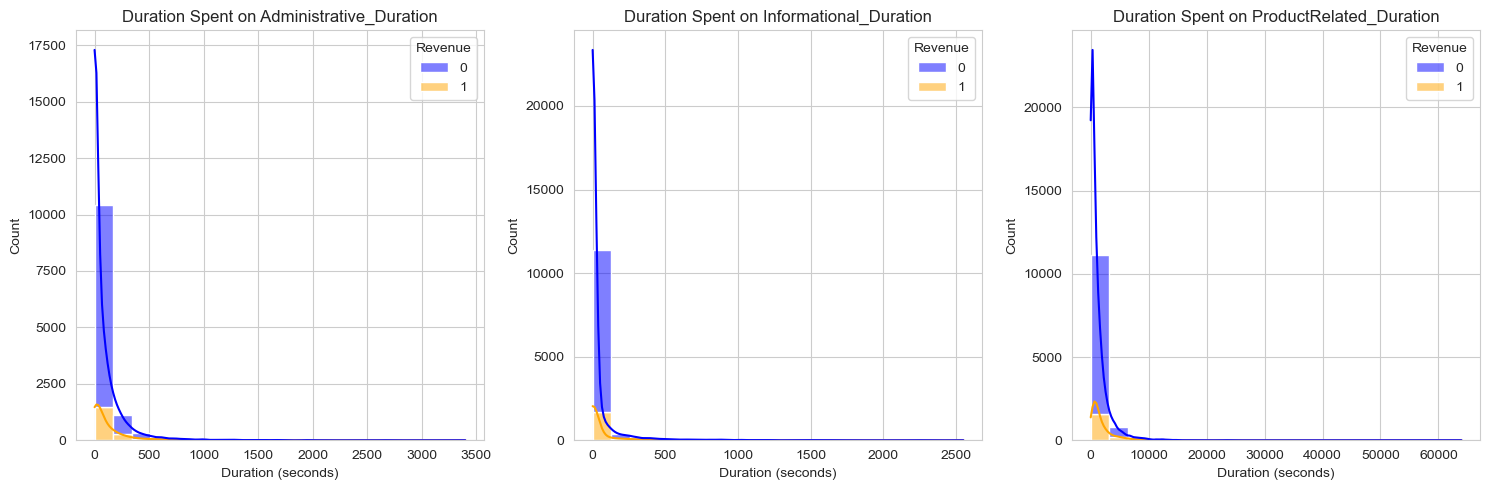

In [23]:
# Plotting the duration spent on different types of pages
# Define colors for revenue and non-revenue sessions
colors = {0: 'blue', 1: 'orange'}

# Plotting the duration spent on different types of pages based on revenue status
plt.figure(figsize=(15, 5))
for i, metric in enumerate(interaction_duration_metrics, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_usp, x=metric, bins=20, kde=True, hue='Revenue', palette=colors, multiple='stack')
    plt.title(f'Duration Spent on {metric}')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
plt.tight_layout()
plt.show();

The above observations suggest that there are differences in behavior between revenue-generating and non-revenue-generating visitors regarding the duration spent on administrative, informational and product-related pages of the website. While both revenue and non-revenue visitors initially spend a similar amount of time on different types of pages (administrative, informational, and product-related), the count of non-revenue visitors significantly surpasses that of revenue visitors, indicating higher engagement levels among non-revenue visitors across all page types.

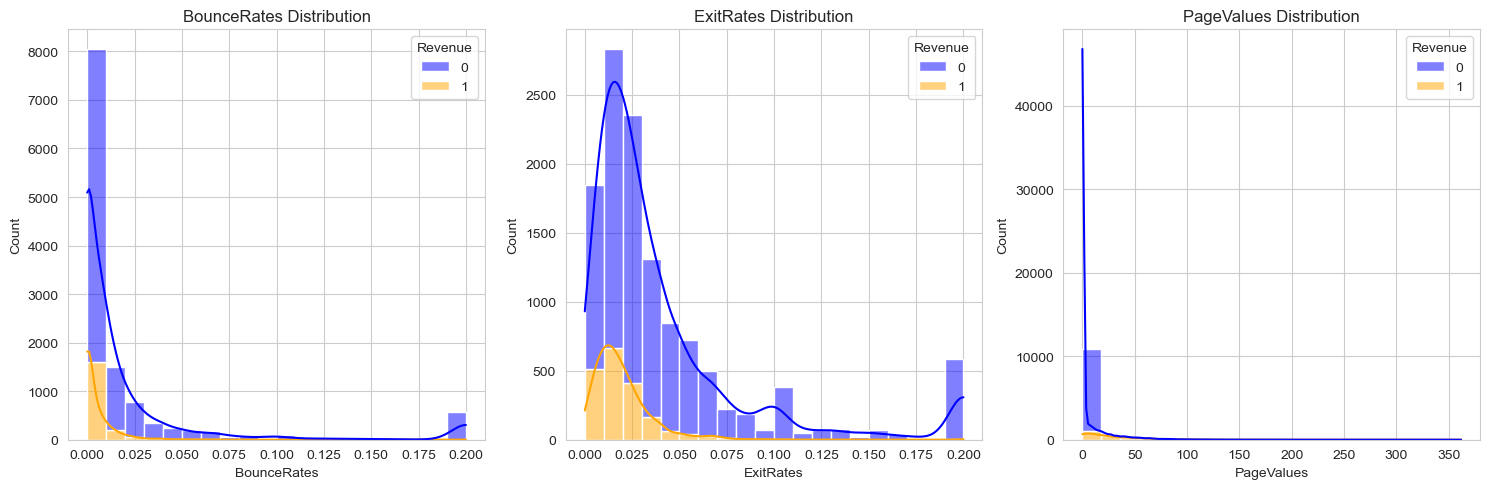

In [24]:
# Define colors for revenue and non-revenue sessions
colors = {0: 'blue', 1: 'orange'}  

# Plotting engagement metrics based on revenue status
plt.figure(figsize=(15, 5))
for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_usp, x=metric, bins=20, kde=True, hue='Revenue', palette=colors, multiple='stack')
    plt.title(f'{metric} Distribution')
    plt.xlabel(metric)
    plt.ylabel('Count')
plt.tight_layout()
plt.show();

The above plot further provides insights into how bounce rates, exit rates and page values relate to user engagement and revenue generation. As can be seen, there is a difference in user behavior between revenue and non-revenue sessions based on all three engagement metrics. Revenue sessions generally have lower bounce rates compared to non-revenue sessions. The plateau observed in the bounce rate plot may indicate a critical threshold where user engagement transitions from active exploration to disengagement or abandonment. For the ExitRates plot, revenue sessions peak at a lower count and exhibit a more gradual decrease in count. Non-revenue sessions peak at a higher count and also exhibit a gradual decrease, with fluctuations in count observed at certain exit rate points, indicating potential points of user disengagement or abandonment. Further, revenue sessions tend to have lower PageValues while non-revenue sessions tend to have much higher PageValues. This implies that PageValues may not be a significant predictor of revenue generation or user engagement.

<b>K-MEANS CLUSTERING - FINDING THE ELBOW FIRST</b>    

Now, selecting a subset of features for clustering, based on intuition, K-means clustering is performed on the original dataset. The Elbow method is used here to determine the optimal number of clusters for K-means clustering. In this case, the plot suggests that the inertia decreases significantly up to k=3 and then the rate of decrease slows down. Therefore, k=3 is chosen as the optimal number of clusters for this dataset.

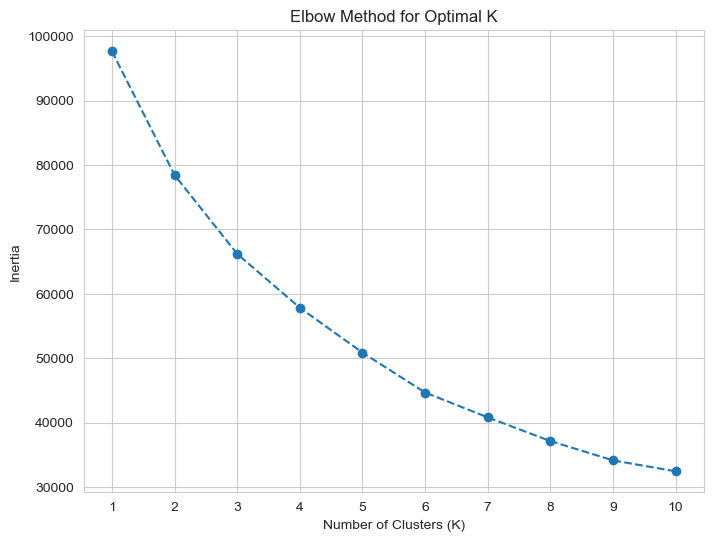

In [25]:
from sklearn.cluster import KMeans

df_usp['Weekend'] = df_usp['Weekend'].astype(int)
objcol = df_usp.select_dtypes(include=['object']).columns
df_usp[objcol] = df_usp[objcol].astype('category')
cat_columns = df_usp.select_dtypes(include='category').columns
#Convert all categorical columns to category codes
df_usp[cat_columns] = df_usp[cat_columns].apply(lambda x: x.cat.codes)

# Selecting features for clustering
features_usp = ['Administrative_Duration', 'ProductRelated_Duration', 
            'BounceRates', 'ExitRates', 'OperatingSystems', 'Browser', 'Region','VisitorType']

# Normalizing features
normalized_df_usp = (df_usp[features_usp] - df_usp[features_usp].mean()) / df_usp[features_usp].std()

# Initialize list to store inertia values
inertia_values = []

# Trying k from 1 to 10 and calculating inertia
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(normalized_df_usp)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow diagram
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show();


<b>CREATING USER SEGMENTS/CLUSTERS : K=3</b>   

Now by applying K-means clustering with 3 clusters, we divide the dataset basically into three groups.

In [26]:
from sklearn.cluster import KMeans

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_usp['Cluster'] = kmeans.fit_predict(normalized_df_usp)

# Display the count of data points in each cluster
print("Count of data points in each cluster:")
print(df_usp['Cluster'].value_counts())


Count of data points in each cluster:
Cluster
2    9565
0    1722
1     918
Name: count, dtype: int64


In the above code, we also check the count of data points (instances) assigned to each cluster after performing K-means, to understand how the data has been partitioned by the clustering algorithm. In this case, Cluster 2 contains the highest number of data points(there are 9565 data points assigned), followed by Cluster 0(there are 1722 data points assigned) and then Cluster 1(there are 918 data points assigned).

In [27]:
# computing the mean values of numerical features for each cluster
cluster_means = df_usp.groupby('Cluster')[features_usp].mean()
print(cluster_means)

         Administrative_Duration  ProductRelated_Duration  BounceRates  \
Cluster                                                                  
0                      93.511552               647.802727     0.001879   
1                       1.668918                63.443424     0.162646   
2                      87.186044              1417.403401     0.010044   

         ExitRates  OperatingSystems   Browser    Region  VisitorType  
Cluster                                                                
0         0.017693          2.184088  2.586527  3.433217     0.033101  
1         0.178397          2.185185  2.315904  3.132898     1.925926  
2         0.032603          2.107580  2.320648  3.104861     1.998745  


Based on the cluster analysis results, we now have insights into the characteristics of each cluster. Below is the summary outlined:  
1. <i>Cluster 0</i>: Cluster 0 seems to represent sessions with longer administrative and product-related durations and lower bounce and exit rates. It represents visitors who spend a significant amount of time on administrative pages, with moderate engagement on product-related pages. They have low bounce rates and moderate exit rates, indicating relatively good engagement with the website. They mainly consist of New Visitors.  
2. <i>Cluster 1</i>:  Cluster 1 represents sessions with shorter durations but higher bounce and exit rates. It represents visitors who spend relatively less time on both administrative and product-related pages. They have high bounce rates and exit rates, indicating poor engagement with the website. They mainly consist of Returning Visitors.  
3. <i>Cluster 2</i>: Cluster 2 appears to represent sessions with very high product-related durations, moderate bounce but low exit rates. It represents visitors who spend a significant amount of time on both administrative and product-related pages. They have moderate bounce rates and low exit rates, indicating good engagement with the website. They mainly consist of Returning Visitors.

<b>CONCLUSION</b>   

This report/notebook was focused on accomplishing the objectives set forth at the beginning.  
  
By developing a Random Forest classifier to predict accurately whether a customer is likely to make a purchase or abandon the site, insights have been leveraged from historical data to anticipate future behavior. The model identifies customers who are likely to make a purchase based on their behavior and characteristics. With this insight, targeted interventions can be implemented specifically for these customers to enhance their shopping experience and encourage them to complete their purchases. By analyzing customer behavior and preferences, personalized product recommendations can also be generated for each individual customer. These recommendations can be tailored to their interests and past shopping patterns, increasing the chances of them finding products they are interested in and making a purchase. The model can also identify customers who may need an extra incentive to make a purchase. Promotional offers, such as discounts or free shipping, can be targeted towards these customers to encourage them to complete their purchases and increase conversion rates.  

Further, with the help of unsupervised learning,visitors have been segmented into distinct groups based on their browsing patterns and session duration. By understanding the characteristics of each cluster, marketers can tailor their strategies to better target and engage different segments of visitors. Insights from clustering can also be used to optimize website design and user experience. For example, since Cluster 1 represents visitors with high bounce rates, website designers can focus on improving landing page design or reducing page load times to increase visitor engagement.

<b>LIMITATIONS</b>  

Real-world data may exhibit changes in underlying patterns or relationships over time. If the distribution of the real-world data shifts significantly from the historical data used for training, the model's performance may degrade. Continuous monitoring and periodic retraining of the model are necessary to adapt to such changes. Collaboration between domain experts, data scientists, and stakeholders is crucial for successful deployment and utilization of supervised models in real-world applications. Besides, clustering results are often subjective and dependent on the choice of distance metric, clustering algorithm, and number of clusters. Different interpretations may arise from the same dataset depending on these choices.

<b>REFERENCES</b>
1. https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset  
2. Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository.           https://doi.org/10.24432/C5F88Q.
3. https://medium.com/@khotijahs1/ensuring-data-quality-in-machine-learning-best-practices-and-python-code-example-809f46cf5bcb
4. https://www.codecademy.com/article/eda-prior-to-unsupervised-clustering